In [1]:
import matplotlib.pyplot as plt
import numpy as np
from carbone import *

In [2]:
def euler(f,y_0,step,t_0,T):
    """Classic Euler Method for solving differential equations"""
    """Use this in orde to solve the problems of type y' = f(t,y)"""
    """Choose an appropriate step size and an appropriate initial value to solve the problem"""
    
    number_steps = np.arange(t_0, t_0 + T + step, step)
    y = [y_0]
    dt = step

    for j in range(0,len(number_steps)-1):
        y_n = y[j] + dt * f(number_steps[j],y[j])
        y.append(y_n)

    return number_steps , np.array(y)

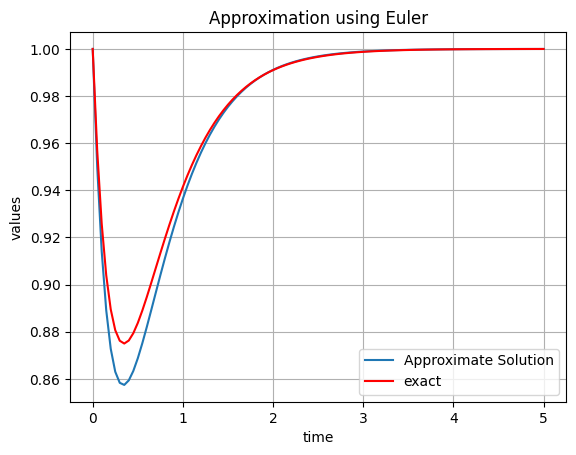

In [3]:
def f(t,y) :
      return 2 - np.exp(-4 * t) - 2*y

def exact_function(t):
  return 1 + 1/2 * np.exp(-4 * t) -1/2 * np.exp(-2 * t)

number_steps , y = euler(f=f, y_0=1, step=0.05, t_0=0, T=5)

    # Plotting the reuslts and the exact results

plt.grid()
plt.title('Approximation using Euler')
plt.xlabel('time')
plt.ylabel('values')
plt.plot(number_steps,y,label='Approximate Solution')
plt.plot(number_steps,exact_function(number_steps),label='exact',color='red')
plt.legend()
plt.show()

In [4]:
def classic_runge_kutta(f, y_0, step, t_0, T):
    """ Implementation of the classical Runge-Kutta Method"""
    """ In this case, q = 4"""

    number_steps = np.arange(t_0, t_0 + T + step, step)
    y = [y_0]
    dt = step

    for j in range(len(number_steps) - 1):

        p_n_1 = f(number_steps[j],y[j])
        t_n_2 = number_steps[j] + 1/2 * dt
        y_n_2 = y[j] + 1/2 * dt * p_n_1
        p_n_2 = f(t_n_2, y_n_2)

        t_n_3 = t_n_2
        y_n_3 = y[j] + 1/2 * dt * p_n_2
        p_n_3 = f(t_n_3,y_n_3)

        t_n_4 = number_steps[j] + dt
        y_n_4 = y[j] + dt * p_n_3
        p_n_4 = f(t_n_4, y_n_4)
    
        
        y.append(y[j] + dt * (1/6 * p_n_1 + 2/6 * p_n_2 + 2/6 * p_n_3 + 1/6 * p_n_4))


    return  number_steps, y

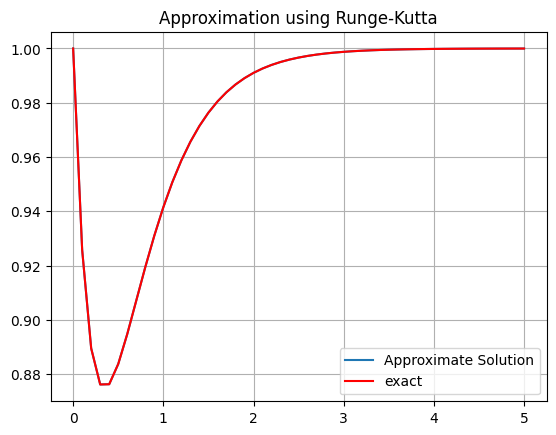

In [5]:
def f(t,y) :  
    return 2 - np.exp(-4 * t) - 2*y

def exact_function(t):  
    return 1 + 1/2 * np.exp(-4 * t) -1/2 * np.exp(-2 * t)

number_steps , y = classic_runge_kutta(f=f, y_0=1, step=0.1, t_0=0, T=5)

# Plotting the reuslts and the exact results
plt.grid()
plt.title('Approximation using Runge-Kutta')
plt.plot(number_steps,y,label='Approximate Solution')
plt.plot(number_steps,exact_function(number_steps),label='exact',color='red')
plt.legend()
plt.show()

In [8]:
def euler_higher_diemension(f, y_0 : list, step:float, t_0: float, T:float):
    """Python Implementation for higher dimension Matrix"""
    
    number_steps = np.arange(t_0, t_0 + T + step, step)
    y = np.zeros((len(number_steps), len(y_0) + 2))
    y[0,:-2] = y_0  
    dt = step
    

    for j in range(len(number_steps) - 1):
        func = f(y[j, :], number_steps[j])
        y[j+1,:-2] = y[j, :-2] + dt * func[:-2]
        y[j+1,-2:] = func[-2:]  
         

    return number_steps , y

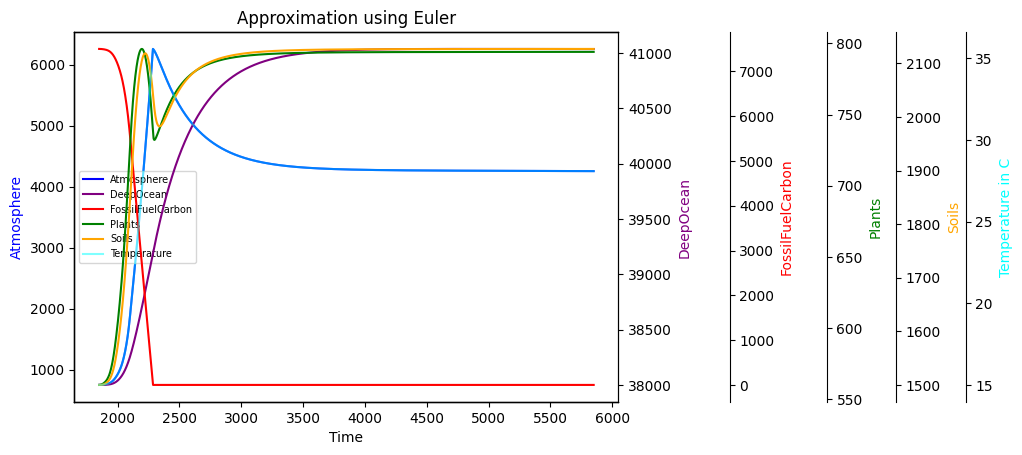

In [25]:

x0 = np.array([Atmosphere_Initial,
               CarbonateRock_Initial,
               DeepOcean_Initial,
               FossilFuel_Initial,
               Plant_Initial,
               Soil_Initial,
               SurfaceOcean_Initial,
               VegLandArea_percent_Initial
               ])
fig, ax = plt.subplots()

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()
twin5 = ax.twinx()

# TO CHANGE

twin2.spines["right"].set_position(("outward", 80))
twin3.spines["right"].set_position(("outward", 150))
twin4.spines["right"].set_position(("outward", 200))
twin5.spines["right"].set_position(("outward", 250))


number_steps, y = euler_higher_diemension(f=derivative, y_0=x0, step=0.1, t_0=1850.0, T=4000)
Temp = GlobalTemp(AtmCO2(y[:, 0])) # Temperature using Atmoshphere


p0, = ax.plot(number_steps, y[:, 0], color="blue", label="Atmosphere")
p1, = twin1.plot(number_steps, y[:, 2], color="purple", label="DeepOcean")
p2, = twin2.plot(number_steps, y[:, 3], color="red", label="FossilFuelCarbon")
p3, = twin3.plot(number_steps, y[:, 4], color="green", label="Plants")
p4, = twin4.plot(number_steps, y[:, 5], color="orange", label="Soils")
p5, = twin5.plot(number_steps, Temp, color='cyan', label="Temperature", alpha = 0.5)

ax.set_xlabel("Time")
ax.set_ylabel("Atmosphere", color="blue")
twin1.set_ylabel("DeepOcean", color="purple")
twin2.set_ylabel("FossilFuelCarbon", color="red")
twin3.set_ylabel("Plants", color="green")
twin4.set_ylabel("Soils", color="orange")
twin5.set_ylabel("Temperature in C", color="cyan")

lines = [p0, p1, p2, p3, p4, p5]
ax.legend(lines, [l.get_label() for l in lines], fontsize='7',loc="center left")


# plot and move left
plt.title('Approximation using Euler')
plt.subplots_adjust(left=0.05)
plt.show()

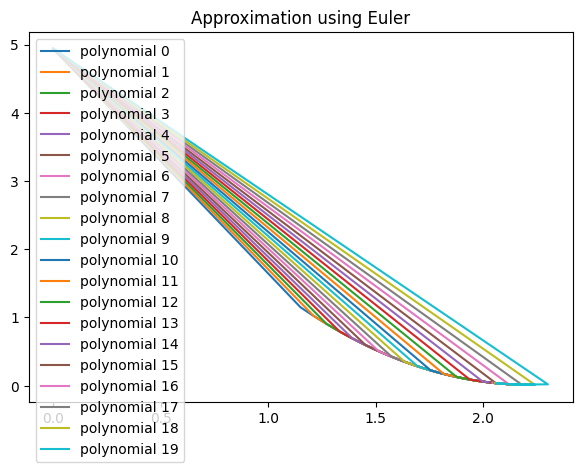

In [18]:
fig, ax = plt.subplots()
Atmosphere_Initial = 750
CarbonateRock_Initial = 100000000   
DeepOcean_Initial = 38000
FossilFuel_Initial = 7500
Plant_Initial = 560
Soil_Initial = 1500
SurfaceOcean_Initial = 890
VegLandArea_percent_Initial = 100
atm = np.linspace(0,800,20)
surfo = np.linspace(500,1000,20)
x0 = [ [a, CarbonateRock_Initial, DeepOcean_Initial, FossilFuel_Initial, Plant_Initial, Soil_Initial, s, VegLandArea_percent_Initial] for (s,a) in zip(surfo,atm)]
polynomial = lambda x,y : pow(x,2) - Alk*(2*x - Alk)*(1-4*y)

for i in range(len(x0)):
    number_steps, y = euler_higher_diemension(f=derivative, y_0=x0[i], step=0.1, t_0=1850.0, T=750)
    ax.plot(y[:,-1], polynomial(y[:,-1],y[:,-2]), label=f"polynomial {i}")



# plot and move left
plt.legend()
plt.title('Approximation using Euler')
plt.subplots_adjust(left=0.05)
plt.show()

In [ ]:
def runge_kutta_higher_dimension(f, y_0, step, t_0, T):
    """Implementing the runga Kutta Method MatrixWise"""
    
    number_steps = np.arange(t_0, t_0 + T + step, step)
    y = np.zeros((len(number_steps), len(y_0) + 2))
    y[0,:] = y_0
    dt = step

    for j in range(len(number_steps) - 1):

        p_n_1 = f(y[j,:],number_steps[j])
        t_n_2 = number_steps[j] + 1/2 * dt
        y_n_2 = y[j,:] + 1/2 * dt * p_n_1
        p_n_2 = f(y_n_2,t_n_2)

        t_n_3 = t_n_2
        y_n_3 = y[j,:] + 1/2 * dt * p_n_2
        p_n_3 = f(y_n_3,t_n_3)

        t_n_4 = number_steps[j] + dt
        y_n_4 = y[j,:] + dt * p_n_3
        p_n_4 = f(y_n_4,t_n_4)
        
        y[j+1,:] = y[j,:] + dt * (1/6 * p_n_1 + 2/6 * p_n_2 + 2/6 * p_n_3 + 1/6 * p_n_4)

    return  number_steps, y

In [ ]:
fig, ax = plt.subplots()

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()
twin5 = ax.twinx()

# TO CHANGE

twin2.spines["right"].set_position(("outward", 80))
twin3.spines["right"].set_position(("outward", 150))
twin4.spines["right"].set_position(("outward", 200))
twin5.spines["right"].set_position(("outward", 250))

number_steps, y = runge_kutta_higher_dimension(f=derivative, y_0=x0, step=0.1, t_0=1850.0, T=750)
Temp = GlobalTemp(AtmCO2(y[:, 0])) # Temperature using Atmoshphere


p0, = ax.plot(number_steps, y[:, 0], color="blue", label="Atmosphere")
p1, = twin1.plot(number_steps, y[:, 2], color="purple", label="DeepOcean")
p2, = twin2.plot(number_steps, y[:, 3], color="red", label="FossilFuelCarbon")
p3, = twin3.plot(number_steps, y[:, 4], color="green", label="Plants")
p4, = twin4.plot(number_steps, y[:, 5], color="orange", label="Soils")
p5, = twin5.plot(number_steps, Temp, color='cyan', label="Temperature", alpha = 0.5)


ax.set_xlabel("Time")
plt.title('Approximation using Runge-Kutta')
ax.set_ylabel("Atmosphere", color="blue")
twin1.set_ylabel("DeepOcean", color="purple")
twin2.set_ylabel("FossilFuelCarbon", color="red")
twin3.set_ylabel("Plants", color="green")
twin4.set_ylabel("Soils", color="orange")
twin5.set_ylabel("Temperature in C", color = "cyan")

lines = [p0, p1, p2, p3, p4, p5]
ax.legend(lines, [l.get_label() for l in lines], fontsize='7',loc="center left")


# plot and move left
plt.subplots_adjust(left=0.05)
plt.show()
